___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Tensorflow Project Exercise
Let's wrap up this Deep Learning by taking a a quick look at the effectiveness of Neural Nets!

We'll use the [Bank Authentication Data Set](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) from the UCI repository.

The data consists of 5 columns:

* variance of Wavelet Transformed image (continuous)
* skewness of Wavelet Transformed image (continuous)
* curtosis of Wavelet Transformed image (continuous)
* entropy of image (continuous)
* class (integer)

Where class indicates whether or not a Bank Note was authentic.

This sort of task is perfectly suited for Neural Networks and Deep Learning! Just follow the instructions below to get started!

## Get the Data

** Use pandas to read in the bank_note_data.csv file **

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd

In [0]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/bank_note_data.csv")

In [4]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive/Colab Notebooks"

 bank_note_data.csv		      Tensorflow_Project.ipynb
'Copy of keras_cnn_tutorial.ipynb'    Untitled
 dataset			      Untitled0.ipynb
 Keras_practice_fashion_mnist.ipynb   Untitled1.ipynb
 mount_drive.ipynb		      Untitled2.ipynb
 murat_cnn.ipynb		      Untitled3.ipynb
'Tensorflow Project.ipynb'


** Check the head of the Data **

In [5]:
data.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## EDA

We'll just do a few quick plots of the data.

** Import seaborn and set matplolib inline for viewing **

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

** Create a Countplot of the Classes (Authentic 1 vs Fake 0) **

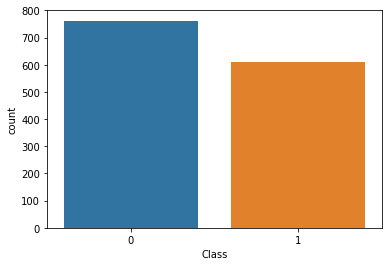

In [7]:
sns.countplot(data = data, x = 'Class')

** Create a PairPlot of the Data with Seaborn, set Hue to Class **

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


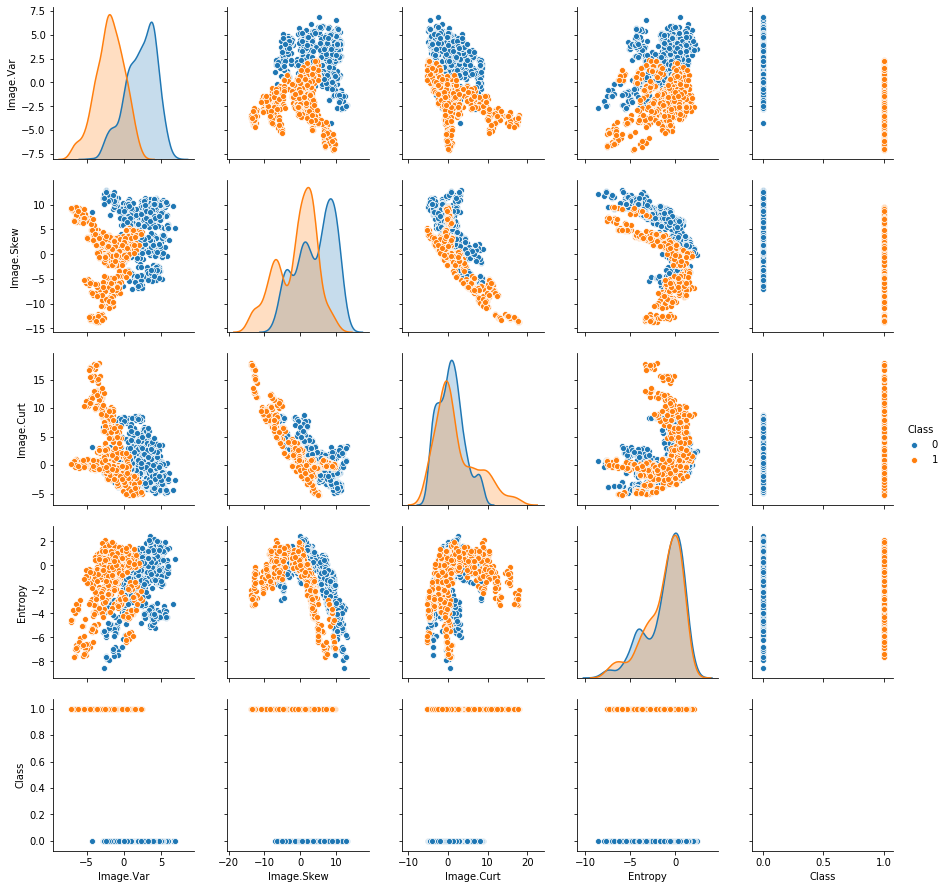

In [8]:
sns.pairplot(data=data, hue = 'Class')

## Data Preparation 

When using Neural Network and Deep Learning based systems, it is usually a good idea to Standardize your data, this step isn't actually necessary for our particular data set, but let's run through it for practice!

### Standard Scaling



In [0]:
from sklearn.preprocessing import StandardScaler

**Create a StandardScaler() object called scaler.**

In [0]:
sc = StandardScaler()

**Fit scaler to the features.**

In [11]:
sc.fit(data.drop('Class', axis =1))

StandardScaler(copy=True, with_mean=True, with_std=True)

**Use the .transform() method to transform the features to a scaled version.**

In [0]:
scaled_f = sc.transform(data.drop('Class', axis =1))

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [13]:
columns = data.columns[:-1]
scaled_df = pd.DataFrame(data = scaled_f, columns = columns)
scaled_df.head()

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


## Train Test Split

** Create two objects X and y which are the scaled feature values and labels respectively.**

In [0]:
X = scaled_df

In [0]:
y= data['Class']

** Use SciKit Learn to create training and testing sets of the data as we've done in previous lectures:**

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Tensorflow

In [18]:
import tensorflow as tf

** Create a list of feature column objects using tf.feature.numeric_column() as we did in the lecture**

In [19]:
X.columns

Index(['Image.Var', 'Image.Skew', 'Image.Curt', 'Entropy'], dtype='object')

In [0]:
image_var = tf.feature_column.numeric_column('Image.Var')
image_skew = tf.feature_column.numeric_column('Image.Skew')
image_curt = tf.feature_column.numeric_column('Image.Curt')
entropy = tf.feature_column.numeric_column('Entropy')
tf_feat_col = [image_var, image_skew, image_curt, entropy]

** Create an object called classifier which is a DNNClassifier from learn. Set it to have 2 classes and a [10,20,10] hidden unit layer structure:**

In [21]:
classifier = tf.estimator.DNNClassifier(hidden_units=[10,20,10], feature_columns= tf_feat_col, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpof0zk7gb', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fb5ec583ac8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


** Now create a tf.estimator.pandas_input_fn that takes in your X_train, y_train, batch_size and set shuffle=True. You can play around with the batch_size parameter if you want, but let's start by setting it to 20 since our data isn't very big. **

In [0]:
input_f = tf.estimator.inputs.pandas_input_fn(X_train, y_train, batch_size=20, shuffle=True)

** Now train classifier to the input function. Use steps=500. You can play around with these values if you want!**

*Note: Ignore any warnings you get, they won't effect your output*

In [23]:
classifier.train(input_fn= input_f, steps=500)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Savi

## Model Evaluation

** Create another pandas_input_fn that takes in the X_test data for x. Remember this one won't need any y_test info since we will be using this for the network to create its own predictions. Set shuffle=False since we don't need to shuffle for predictions.**

In [0]:
input_test = tf.estimator.inputs.pandas_input_fn(x= X_test, batch_size= len(X_test), shuffle=False)

** Use the predict method from the classifier model to create predictions from X_test **

In [25]:
predictions = list(classifier.predict(input_fn=input_test))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpof0zk7gb/model.ckpt-48
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [26]:
predictions[0]

{'all_class_ids': array([0, 1], dtype=int32),
 'all_classes': array([b'0', b'1'], dtype=object),
 'class_ids': array([1]),
 'classes': array([b'1'], dtype=object),
 'logistic': array([0.89866805], dtype=float32),
 'logits': array([2.1825116], dtype=float32),
 'probabilities': array([0.10133199, 0.89866805], dtype=float32)}

In [0]:
final_pred = []
for pred in predictions:
    final_pred.append(pred['class_ids'][0])


** Now create a classification report and a Confusion Matrix. Does anything stand out to you?**

In [0]:
from sklearn.metrics import confusion_matrix, classification_report

In [29]:
print(confusion_matrix(y_test, final_pred))

[[219   9]
 [  0 184]]


In [31]:
print(classification_report(y_test, final_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       228
           1       0.95      1.00      0.98       184

    accuracy                           0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412



## Optional Comparison

** You should have noticed extremely accurate results from the DNN model. Let's compare this to a Random Forest Classifier for a reality check!**

**Use SciKit Learn to Create a Random Forest Classifier and compare the confusion matrix and classification report to the DNN model**

** It should have also done very well, possibly perfect! Hopefully you have seen the power of DNN! **

# Great Job!